# Lasso Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [3]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

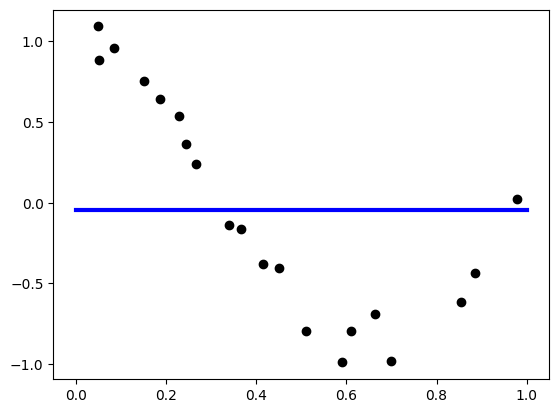

In [4]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


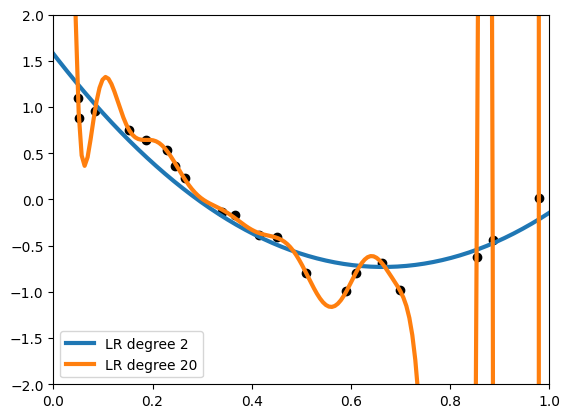

In [5]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (ElasticNet Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

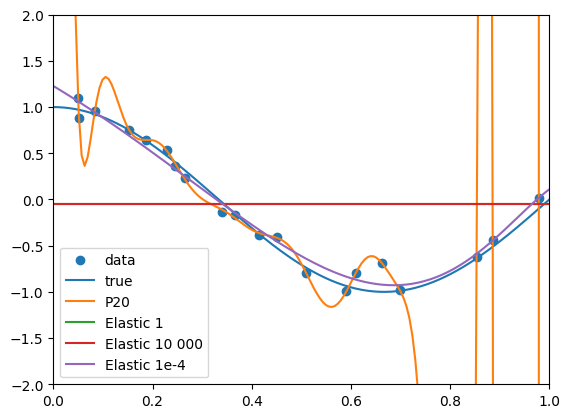

In [8]:
#my solution
models = []
models.append(('P20',make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))
models.append(('Elastic 1', make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=1.0) )))
models.append((' 10 000', make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=10000) )))
models.append(('Lasso 1e-4', make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=1e-4,max_iter=5000) )))

plt.scatter(x,y, label = 'data')
plt.plot(x_plot, true_fun(x_plot), label ='true')
for name, model in models:
    model.fit(x,y)
    predict = model.predict(x_plot)
    plt.plot(x_plot,predict,label=name)
    
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend()
plt.show()

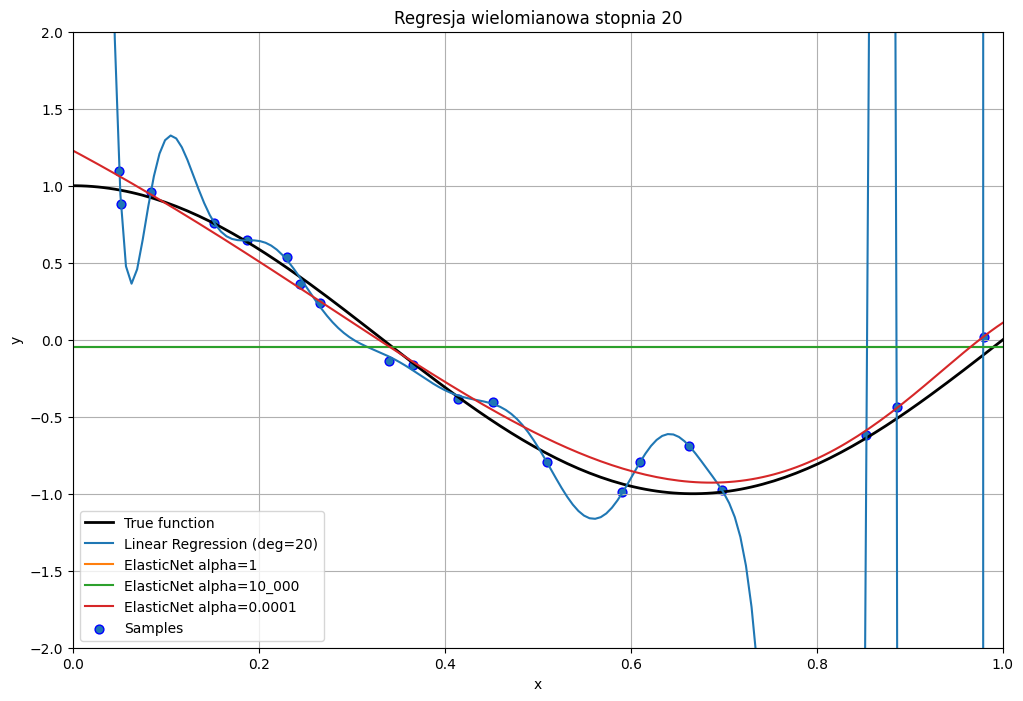

In [10]:
#chatgpt solution
# Regresje
models = {
    "Linear Regression (deg=20)": make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()),
    "ElasticNet alpha=1": make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=1)),
    "ElasticNet alpha=10_000": make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=10_000)),
    "ElasticNet alpha=0.0001": make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=0.0001,max_iter=5000)),
}

# Rysowanie
plt.figure(figsize=(12, 8))
plt.plot(x_plot, true_fun(x_plot), label="True function", color='black', linewidth=2)

for label, model in models.items():
    model.fit(x, y)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot, y_plot, label=label)

plt.scatter(x, y, edgecolor='b', s=40, label="Samples")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresja wielomianowa stopnia 20")
plt.legend()
plt.grid(True)
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [11]:
#my solution
from sklearn.model_selection import GridSearchCV
model = make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=1,max_iter=50000))
gs = GridSearchCV(model,
                  param_grid={
                    'polynomialfeatures__degree': [i for i in range(1, 20)],
                    'elasticnet__alpha': [1,0.5,0.1,0.01,0.001]
                  }
                  )
gs.fit(x,y)
print(gs.best_score_)
print(gs.best_params_)

-0.23846688307792485
{'elasticnet__alpha': 0.001, 'polynomialfeatures__degree': 19}


Najlepsze parametry:
{'elasticnet__alpha': 0.0001, 'poly__degree': 3}


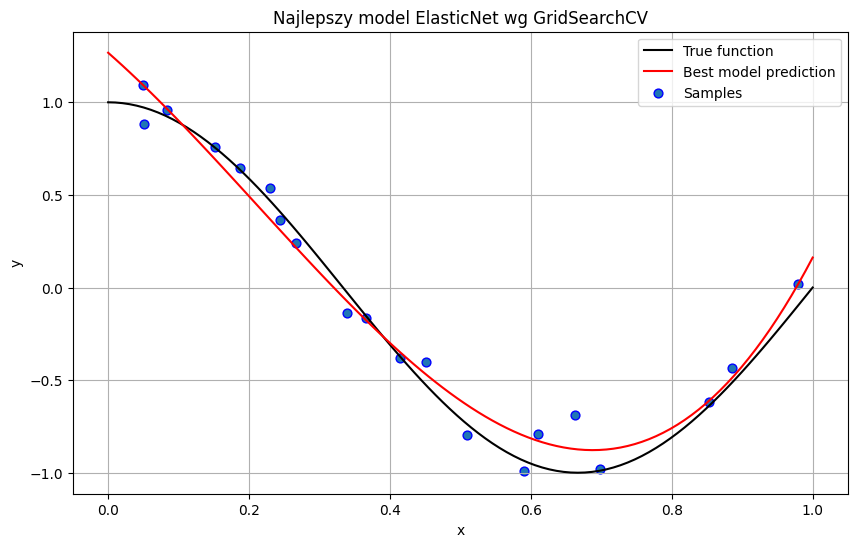

In [12]:
#chatgpt solution
from sklearn.pipeline import Pipeline
# Pipeline: PolynomialFeatures + ElasticNet
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('elasticnet', ElasticNet(max_iter=50000)),
])

# Parametry do przeszukania
param_grid = {
    'poly__degree': np.arange(1, 21),                  # Stopnie od 1 do 20
    'elasticnet__alpha': [1e-4, 1e-2, 0.1, 1, 10, 100, 1e4]  # Różne wartości alpha
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x, y)

# Najlepsze parametry
print("Najlepsze parametry:")
print(grid_search.best_params_)

# Rysunek
x_plot = np.linspace(0, 1, 100).reshape(-1, 1)
y_plot = grid_search.predict(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, true_fun(x_plot), label="True function", color='black')
plt.plot(x_plot, y_plot, label="Best model prediction", color='red')
plt.scatter(x, y, edgecolor='blue', s=40, label="Samples")
plt.title("Najlepszy model ElasticNet wg GridSearchCV")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [13]:
import pandas as pd
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [14]:
from sklearn.metrics import r2_score
#my solution
model = make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=1,max_iter=50000))
#zmniejszylem ilosc cech wielomianowych bo w przeciwnym wypadku obliczenia byly niestabilne numerycznie i dostawalem duzo warningow
gs = GridSearchCV(model, param_grid = {
                            'polynomialfeatures__degree': [i for i in range(1, 3)],
                            'elasticnet__alpha': [1,0.5,0.1,0.01]
                        },
                  scoring='r2'
                  )
gs.fit(X, y)
print(gs.best_params_)
score = r2_score(y, gs.predict(X))
print(f'r2_score: {score}')

{'elasticnet__alpha': 1, 'polynomialfeatures__degree': 2}
r2_score: 0.9862245675928116


In [15]:
#chatgpt solution
# Pipeline: Polynomial + Lasso
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),  # include_bias=False bo Ridge sam doda intercept
    ('elasticnet', ElasticNet(max_iter=50000)),
])

# Parametry do przeszukania
param_grid = {
    'poly__degree': [1, 2, 3],  # Stopień wielomianu (dla 3 cech nie przesadzać)
    'elasticnet__alpha': [0.01, 0.1, 1, 10, 100]
}

# GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid.fit(X, y)

# Najlepsze parametry
print("Najlepsze parametry:")
print(grid.best_params_)

# R² score dla najlepszego modelu
y_pred = grid.predict(X)
r2 = r2_score(y, y_pred)
print(f"R² score dla najlepszego modelu: {r2:.4f}")

Najlepsze parametry:
{'elasticnet__alpha': 1, 'poly__degree': 3}
R² score dla najlepszego modelu: 0.9917
